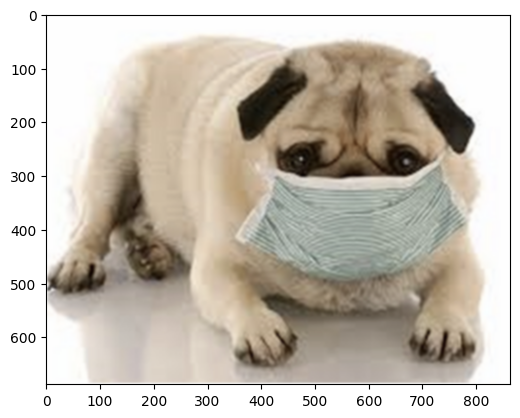

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("../data/dogs-vs-cats/pug.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


2025-12-08 15:04:11.883638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-08 15:04:12.381834: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-08 15:04:14.752300: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-08 15:04:14.752300: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [5]:
model = VGG16(weights="imagenet")
# Downloads weights from: https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5


E0000 00:00:1765173856.394632   29908 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1765173856.404306   29908 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-12-08 15:04:16.581211: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 411041792 exceeds 10% of free system memory.
2025-12-08 15:04:16.669809: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 411041792 exceeds 10% of free system memory.
2025-12-08 15:04:16.726056: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Al

In [6]:
image = cv2.resize(image, dsize=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)


In [7]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2] * 100))
# Example output: pug (82.43%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
pug (82.43%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
pug (82.43%)


In [8]:
decode_predictions(yhat, top=3)[0]

[('n02110958', 'pug', np.float32(0.8243445)),
 ('n03803284', 'muzzle', np.float32(0.062335767)),
 ('n02099712', 'Labrador_retriever', np.float32(0.029677123))]

In [9]:
import glob
import os

path = "../data/dogs-vs-cats/train"
full_names = []

for class_name in ["cat", "dog"]:
    pattern = os.path.join(path, class_name, "*.jpg")
    full_names.extend(glob.glob(pattern))

labels = [os.path.basename(each).split(".")[0] for each in full_names]
file_id = [os.path.basename(each).split(".")[1] for each in full_names]


In [10]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


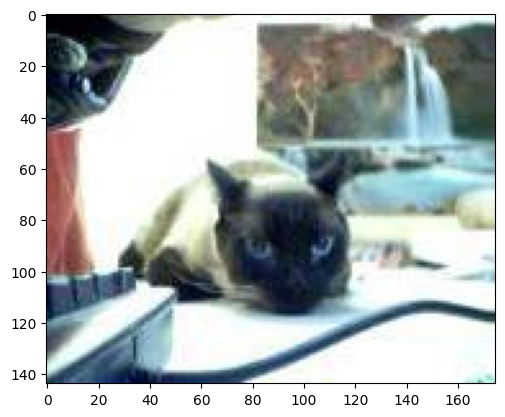

In [11]:
image = mpimg.imread(full_names[50])
plt.imshow(image)
plt.show()


In [12]:
image = cv2.resize(image, dsize=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2] * 100))
# Example output: flat-coated_retriever (51.95%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Siamese_cat (49.55%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Siamese_cat (49.55%)


In [13]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2
import numpy as np

def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)  # batch dim
    return preprocess_input(image)

def predict_vgg(model, image, top=1):
    yhat = model.predict(image)
    decoded = decode_predictions(yhat, top=top)[0]
    return decoded  # list of (class_id, class_name, prob)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


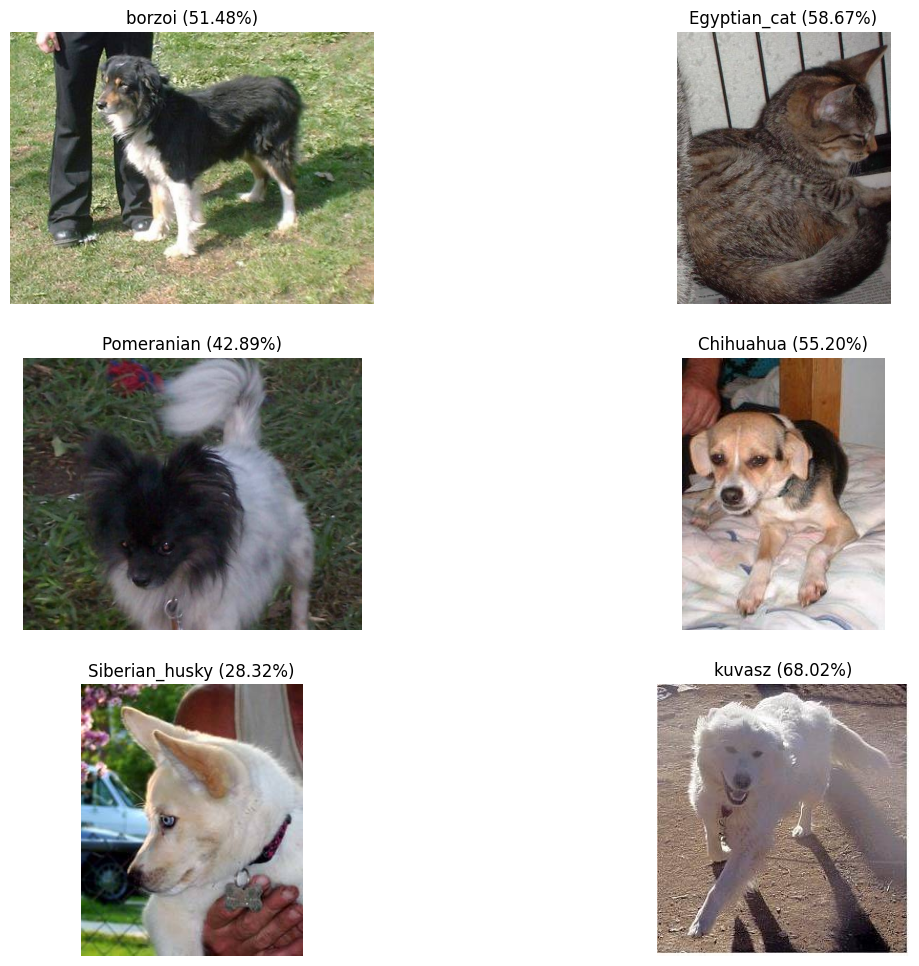

In [15]:
plt.figure(figsize=(14, 12))
for idx, each in enumerate(random.choices(full_names, k=6), start=1):
    image = mpimg.imread(each)
    plt.subplot(3, 2, idx)
    plt.imshow(image)
    plt.axis("off")

    pre = resize_and_preprocess_vgg(image)
    preds = predict_vgg(model, pre, top=1)
    top_name, top_prob = preds[0][1], preds[0][2]
    plt.title(f"{top_name} ({top_prob:.2%})")

plt.show()
